In [1]:
import sys  
sys.path.insert(0, '/Users/navinlr/Desktop/Thesis/code_base/conversation_quality')

In [2]:
import utilities.data_read_util as reader
import constants
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
data = reader.get_annotated_fformations(constants.fform_annot_data)

In [4]:
fform_data=[]
for day in data.keys():
    day_data = data[day]
    if len(fform_data) == 0:
        fform_data=day_data
    else:
        fform_data=pd.concat([fform_data, day_data])
    
print("Number of F-Formations = " + str(len(fform_data)))
    
fform_data['cardinality']=fform_data['subjects'].apply(lambda x: len(x))

print(fform_data[:2])

Number of F-Formations = 174
       subjects           timestart             timeend  samplestart  \
0       [3, 37] 1900-01-01 00:10:00 1900-01-01 00:14:04        12000   
1  [13, 22, 36] 1900-01-01 00:10:00 1900-01-01 00:12:09        12000   

   sampleend  duration_mins  duration_secs  cardinality  
0      16880           4.07          244.0            2  
1      14580           2.15          129.0            3  


In [5]:
import collections

{1: 41, 2: 55, 3: 33, 4: 27, 5: 6, 6: 7, 7: 5}
dict_values([41, 55, 33, 27, 6, 7, 5])


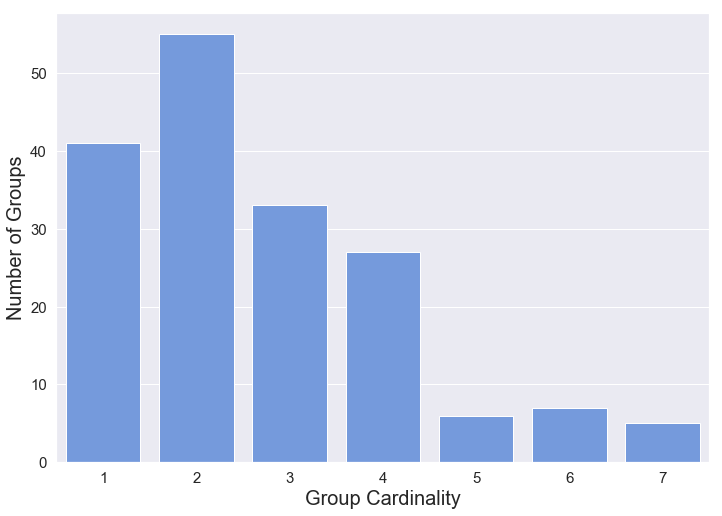

In [6]:
group_size_counter= dict(sorted(collections.Counter(fform_data['cardinality']).items())) #sorted(dict(collections.Counter(fform_data['cardinality'])))
print(group_size_counter)
print(group_size_counter.values())



sns.barplot(list(group_size_counter.keys()), list(group_size_counter.values()), color="cornflowerblue")
plt.ylabel('Number of Groups', fontsize=20)
plt.xlabel('Group Cardinality', fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [8]:
num_bins = 7
# counts, bins = np.histogram(fform_data['duration_mins'], bins=num_bins, color="cornflowerblue")
# bins = bins[:-1] + (bins[1] - bins[0])/2
# probs = counts/float(counts.sum())
# plt.bar(bins, probs, 1.0/num_bins)
# plt.ylabel('Probability Distribution', fontsize=20)
# plt.xlabel('Group Cardinality', fontsize=20)
# plt.tick_params(labelsize=15)
# plt.show()

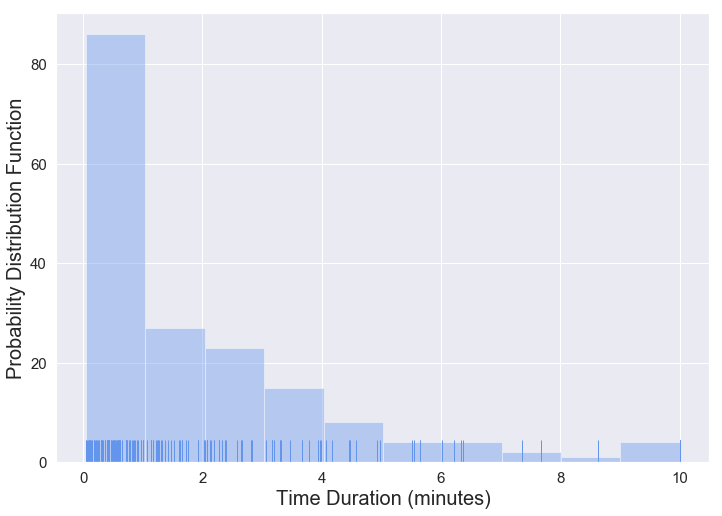

In [9]:
sns.distplot(fform_data['duration_mins'], kde=False, rug=True, bins=10, color="cornflowerblue")
plt.ylabel('Probability Distribution Function', fontsize=20)
plt.xlabel('Time Duration (minutes)', fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [10]:
from scipy import stats

print(np.mean(fform_data['duration_mins']))
print(np.std(fform_data['duration_mins']))
print(np.median(fform_data['duration_mins']))
print(stats.mode(fform_data['duration_mins']))

1.9117241379310344
2.1340411219343953
1.1
ModeResult(mode=array([0.42]), count=array([6]))


In [11]:
import utilities.data_proc_util as data_processor

data = pd.read_csv(constants.final_grps_raw_data)
sheet_data = data_processor.add_column_fform_data(data,"final")
sheet_data["subjects"] = data_processor.clean_subjects_list(sheet_data["subjects"])

sheet_data['cardinality']=sheet_data['subjects'].apply(lambda x: len(x))

In [12]:
sheet_data

,groupid,subjects,timestart,timeend,samplestart,sampleend,duration_secs,duration_mins,cardinality
0,1_005,"[13, 22, 36]",10:00,12:09,12000,14580,129.0,2.15,3
1,1_018,"[31, 35, 20]",10:32,11:47,12640,14140,75.0,1.25,3
2,1_019,"[17, 25, 28]",10:32,11:27,12640,13740,55.0,0.92,3
3,1_020,"[19, 34]",10:32,11:47,12640,14140,75.0,1.25,2
4,1_030,"[17, 19, 28]",12:06,13:00,14520,15600,54.0,0.90,3
...,...,...,...,...,...,...,...,...,...
110,3_069,"[12, 15]",25:30,26:40,30600,32000,70.0,1.17,2
111,3_070,"[24, 8]",20:40,23:10,24800,27800,150.0,2.50,2
112,3_071,"[24, 8]",23:25,25:25,28100,30500,120.0,2.00,2
113,3_072,"[26, 27, 28, 37]",20:09,22:39,24180,27180,150.0,2.50,4


{2: 56, 3: 26, 4: 22, 5: 6, 6: 3, 7: 2}
dict_values([56, 26, 22, 6, 3, 2])


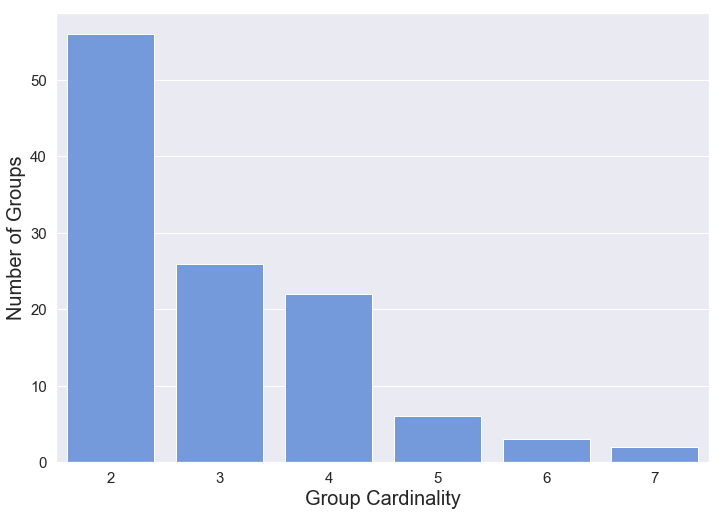

2.9565217391304346
1.1824168642368729


In [15]:
group_size_counter= dict(sorted(collections.Counter(sheet_data['cardinality']).items())) #sorted(dict(collections.Counter(fform_data['cardinality'])))
print(group_size_counter)
print(group_size_counter.values())



sns.barplot(list(group_size_counter.keys()), list(group_size_counter.values()), color="cornflowerblue")
plt.ylabel('Number of Groups', fontsize=20)
plt.xlabel('Group Cardinality', fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

print(np.mean(sheet_data['cardinality']))
print(np.std(sheet_data['cardinality']))

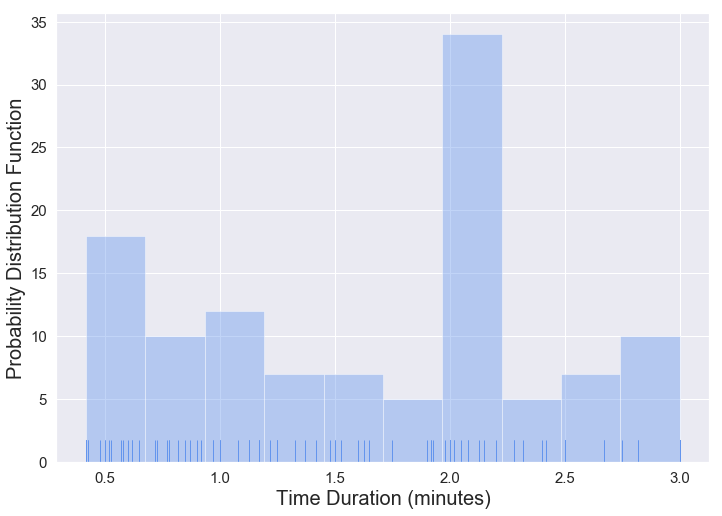

1.6280869565217388
0.7544636974032833


In [19]:
sns.distplot(sheet_data['duration_mins'], kde=False, rug=True, bins=10, color="cornflowerblue")
plt.ylabel('Probability Distribution Function', fontsize=20)
plt.xlabel('Time Duration (minutes)', fontsize=20)
# plt.set_xticklabels(['0','1','2','3','4','2016','2017','2018'])
plt.tick_params(labelsize=15)
plt.show()

print(np.mean(sheet_data['duration_mins']))
print(np.std(sheet_data['duration_mins']))